In [0]:
%matplotlib inline

Preparing data

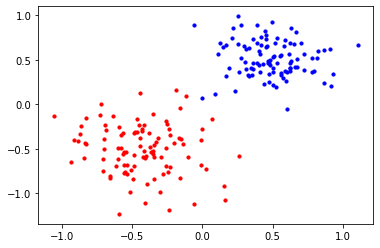

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt 
import numpy as np

centers = [(-0.5, -0.5), (0.5, 0.5)]
cluster_std = [0.3, 0.2]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

y[y==0] = -1

plt.scatter(X[y == -1, 0], X[y == -1, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

Test train split

In [0]:
from sklearn.model_selection import train_test_split
# split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Perceptron model

In [0]:
#initialize Weights to zero values
W = np.zeros((2,1))
# set some learning rate for gradient descent
lr = 1
accuracies = []

for epoch in range(100):
    for idx in range(len(X_train)):

        # update weights if the prediction is wrong
        
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    # keep a track of everything happeniing here.. . . .
    Y_test_pred = (X_test@W).reshape(-1)
    Y_test_pred[Y_test_pred < 0] = -1
    Y_test_pred[Y_test_pred >= 0] = 1

    acc = np.mean(Y_test == Y_test_pred)
    accuracies.append(acc)

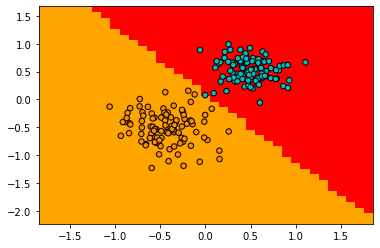

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
from matplotlib.colors import ListedColormap
h = 0.1
cmap_light = ListedColormap(['orange', 'red'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Text(0, 0.5, 'Accuracy')

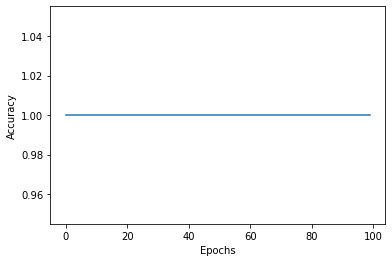

In [11]:
epochs = list(range(0,100))
plt.plot(epochs, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

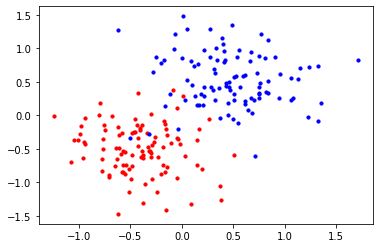

In [40]:
from sklearn.datasets.samples_generator import make_blobs

centers = [(-0.5, -0.5), (0.5, 0.5)]
cluster_std = [0.4, 0.4]

X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
y[y==0] = -1

plt.scatter(X[y == -1, 0], X[y == -1, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [0]:
from sklearn.model_selection import train_test_split
# split data into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
#initialize Weights to zero values
W = np.zeros((2,1))
# set some learning rate for gradient descent
lr = 1
accuracies2 = []
for epoch in range(100):
    for idx in range(len(X_train)):

        # update weights if the prediction is wrong
        
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    
    # keep a track of everything happeniing here.. . . .
    Y_test_pred = (X_test@W).reshape(-1)
    Y_test_pred[Y_test_pred < 0] = -1
    Y_test_pred[Y_test_pred >= 0] = 1
    acc = np.mean(Y_test == Y_test_pred)
    accuracies2.append(acc)


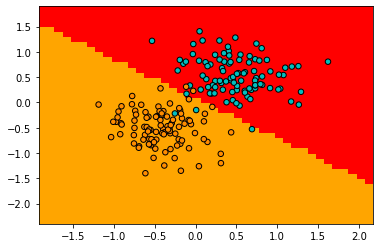

In [38]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.1
cmap_light = ListedColormap(['orange', 'red'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Text(0, 0.5, 'Accuracy')

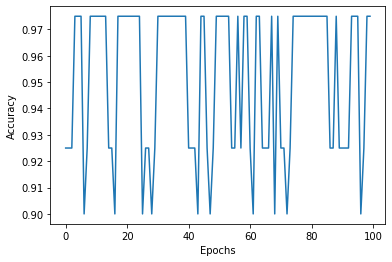

In [43]:
epochs = list(range(0,100))
plt.plot(epochs, accuracies2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')